In [ ]:
### ML Stroke Model

##Benjamin Wang

#The goal of this project is to make a machine learning model that can predict whether or not a given subject will have
#a stroke based on mutiple factors such as age, gender, Body Mass Index (BMI), etc.

In [ ]:
### Milestone 1: EDA Stage 1

In [ ]:
#First, we will load the data up with pandas, check the shape, and take a peek at it.

In [3]:
from pandas import read_csv
filename = '/Users/benjamin/Desktop/133_Project/healthcare-dataset-stroke-data.csv'
names = ['ID', 'Gender', 'Age','Hypertension','Heart Disease', 'Married', 'Work Type', 'Residence Type',
        'Glucose Level', 'BMI', 'Smoking Status', 'Stroke']
data = read_csv(filename, skiprows = 1, names=names)
print(data.shape)

(5110, 12)


In [28]:
data.head(20)

,ID,Gender,Age,Hypertension,Heart Disease,Married,Work Type,Residence Type,Glucose Level,BMI,Smoking Status,Stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,0,0,202.21,NaN,0,1
2,31112,1,80.0,0,1,1,1,0,105.92,32.5,0,1
3,60182,0,49.0,0,0,1,1,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,1,0,0,174.12,24.0,0,1
5,56669,1,81.0,0,0,1,1,1,186.21,29.0,1,1
6,53882,1,74.0,1,1,1,1,0,70.09,27.4,0,1
7,10434,0,69.0,0,0,0,1,1,94.39,22.8,0,1
8,27419,0,59.0,0,0,1,1,0,76.15,NaN,3,1
9,60491,0,78.0,0,0,1,1,1,58.57,24.2,3,1


In [29]:
#Next, we will split the cell so we can save a segment for testing the model

In [30]:
import pandas as pd
import numpy as np
import random

def goodSplit(filename, modelDevDataset,holdOutDataset):
    
    assert len(filename) == len(modelDevDataset) + len(holdOutDataset) # tests for sumation intergrity
    
    assert holdOutDataset.values not in modelDevDataset.values # tests for duplicates
    return True

filename = '/Users/benjamin/Desktop/133_Project/healthcare-dataset-stroke-data.csv'

# Take out 10% of the data as random sample 
holdOutDataset = filename.sample(frac = 0.10)

# Remove the 10% sample data from your dataset
modelDevDataset = filename.drop(holdOutDataset.index)

# sum of lengths of the holdout dataset and the remaining data for model development should add up to the length of the initial data
results1 = []
print("is my data split good?:",goodSplit(filename, modelDevDataset,holdOutDataset))
print(len(modelDevDataset))
print(len(holdOutDataset))
print('The length of your full dataset is :', len(filename))
print('The length of your avalable data for model development is :', len(modelDevDataset))
print('The length of your data held as unseen data is :',len(holdOutDateset))
modelDevDataset.to_csv (r'/Users/benjamin/Desktop/133_Project/modelDevDataset.csv', index = None, header=True)
holdOutDataset.to_csv (r'/Users/benjamin/Desktop/133_Project/holdOutDateset.csv', index = None, header=True)

AttributeError: 'str' object has no attribute 'sample'

In [31]:
#We will then check for missing data. It appears that the BMI feature is missing 201 elements in the form of N/A. 
#Thus, we will clean the N/A values from the dataset.
#Now the data is more consistent.

In [32]:
#Check for missing data
print(data.isnull().sum())

ID                  0
Gender              0
Age                 0
Hypertension        0
Heart Disease       0
Married             0
Work Type           0
Residence Type      0
Glucose Level       0
BMI               201
Smoking Status      0
Stroke              0
dtype: int64


In [4]:
#Clean missing values in the data by dropping rows with at least 1 null value
data1 = data.dropna()
print(data1.isnull().sum())

ID                0
Gender            0
Age               0
Hypertension      0
Heart Disease     0
Married           0
Work Type         0
Residence Type    0
Glucose Level     0
BMI               0
Smoking Status    0
Stroke            0
dtype: int64


In [34]:
#Check the shape again
shape = data1.shape
print(shape)

(4909, 12)


In [35]:
data1.head(20)

,ID,Gender,Age,Hypertension,Heart Disease,Married,Work Type,Residence Type,Glucose Level,BMI,Smoking Status,Stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,1,0,105.92,32.5,0,1
3,60182,0,49.0,0,0,1,1,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,1,0,0,174.12,24.0,0,1
5,56669,1,81.0,0,0,1,1,1,186.21,29.0,1,1
6,53882,1,74.0,1,1,1,1,0,70.09,27.4,0,1
7,10434,0,69.0,0,0,0,1,1,94.39,22.8,0,1
9,60491,0,78.0,0,0,1,1,1,58.57,24.2,3,1
10,12109,0,81.0,1,0,1,1,0,80.43,29.7,0,1
11,12095,0,61.0,0,1,1,2,0,120.46,36.8,2,1


In [ ]:
#After cleaning up the data, we should further understand the dimensions of the data. 
#We have already checked the new shape of the data after dropping the null values, 
#so we can then check the types of each attribute. 
#Next, we should get a summary of the Descriptive Statistics 
#(Mean, Max, Min, Standard Deviation, Quartiles) though the describe() method.
#We can also check the skew of the data as well.

In [8]:
#Check Data Types
types = data1.dtypes
print(types)

ID                  int64
Gender              int64
Age               float64
Hypertension        int64
Heart Disease       int64
Married             int64
Work Type           int64
Residence Type      int64
Glucose Level     float64
BMI               float64
Smoking Status      int64
Stroke              int64
dtype: object


In [9]:
#Summary of Descriptive Statistics
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 3)

description = data1.describe()
print(description)

              ID    Gender       Age  Hypertension  Heart Disease   Married  Work Type  \
count   4909.000  4909.000  4909.000      4909.000       4909.000  4909.000   4909.000   
mean   37064.314     0.410    42.865         0.092          0.050     0.653      1.257   
std    20995.098     0.492    22.555         0.289          0.217     0.476      0.898   
min       77.000     0.000     0.080         0.000          0.000     0.000      0.000   
25%    18605.000     0.000    25.000         0.000          0.000     0.000      1.000   
50%    37608.000     0.000    44.000         0.000          0.000     1.000      1.000   
75%    55220.000     1.000    60.000         0.000          0.000     1.000      2.000   
max    72940.000     2.000    82.000         1.000          1.000     1.000      4.000   

       Residence Type  Glucose Level       BMI  Smoking Status    Stroke  
count        4909.000       4909.000  4909.000        4909.000  4909.000  
mean            0.507        105.305   

In [10]:
#Check Balance
class_counts = data1.groupby('Stroke').size()
print(class_counts)

Stroke
0    4700
1     209
dtype: int64


In [11]:
#Here we will use the Stoke feature as the data attribute we are using for checking balance. This is because we can 
#easily classify the data as a 1 or 0, which represents “yes” or “no.”
#There appears to be an imbalance towards no strokes, as there are more people without strokes 
#than with strokes (probably good for them though).
#95% of the data is no strokes

In [12]:
#Check Skew
skew = data1.skew()
print(skew)

ID               -0.040
Gender            0.371
Age              -0.119
Hypertension      2.827
Heart Disease     4.155
Married          -0.642
Work Type         0.752
Residence Type   -0.029
Glucose Level     1.614
BMI               1.055
Smoking Status    0.166
Stroke            4.533
dtype: float64


In [13]:
#We can see here that the data is mostly positively skewed (to the right) except for Age and ID.

In [14]:
#Next, we will do a pearson correlation

In [15]:
#Pearson Correlation
set_option('display.width', 100)
set_option('precision', 3)

correlation = data1.corr(method = 'pearson')
print(correlation)

                   ID  Gender    Age  Hypertension  Heart Disease  Married  Work Type  \
ID              1.000   0.007  0.009         0.001          0.004    0.017     -0.004   
Gender          0.007   1.000 -0.031         0.022          0.083   -0.037      0.076   
Age             0.009  -0.031  1.000         0.274          0.257    0.681     -0.586   
Hypertension    0.001   0.022  0.274         1.000          0.116    0.162     -0.140   
Heart Disease   0.004   0.083  0.257         0.116          1.000    0.111     -0.102   
Married         0.017  -0.037  0.681         0.162          0.111    1.000     -0.464   
Work Type      -0.004   0.076 -0.586        -0.140         -0.102   -0.464      1.000   
Residence Type  0.005  -0.005  0.011        -0.001         -0.002    0.005      0.002   
Glucose Level   0.006   0.054  0.236         0.181          0.155    0.151     -0.102   
BMI             0.003  -0.027  0.333         0.168          0.041    0.342     -0.349   
Smoking Status -0.011

In [16]:
#We can see that the correlation between these values is rather low, except Age has a stronger correlation with the
#other features. This is consistent with the fact that older populations tend to have higher BMIs and risks for heart
#disease and strokes.

#We also see this in the seaborn heatmap and plot correlation matrix as well.

<AxesSubplot:>

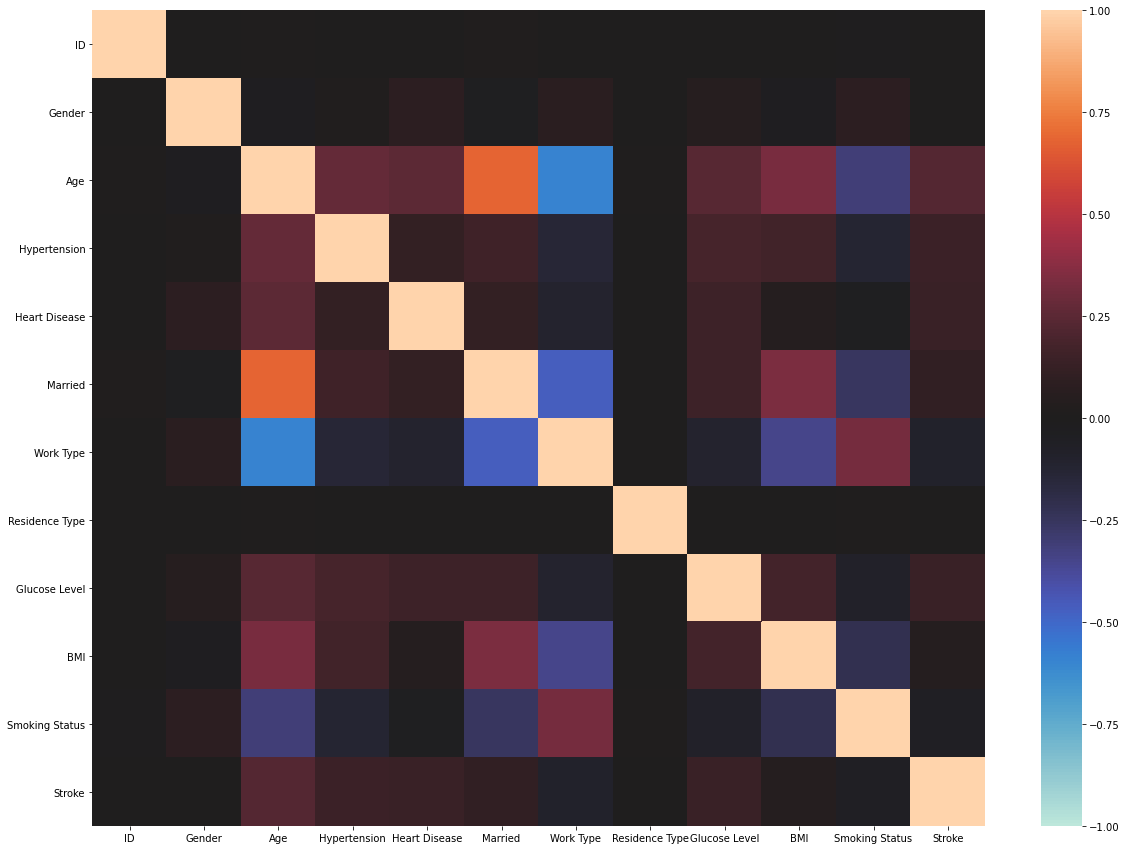

In [36]:
#Seaborn Heatmap
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))
set_option('display.width', 200)

sns.heatmap(data1.corr(), annot = False, vmin=-1, vmax=1, center= 0)

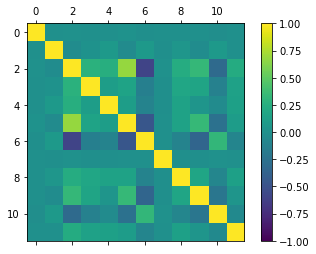

In [37]:
# plot correlation matrix
import numpy
import matplotlib.pyplot as plt
correlations = data1.corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

In [ ]:
#Next, we will visualize our data with charts.

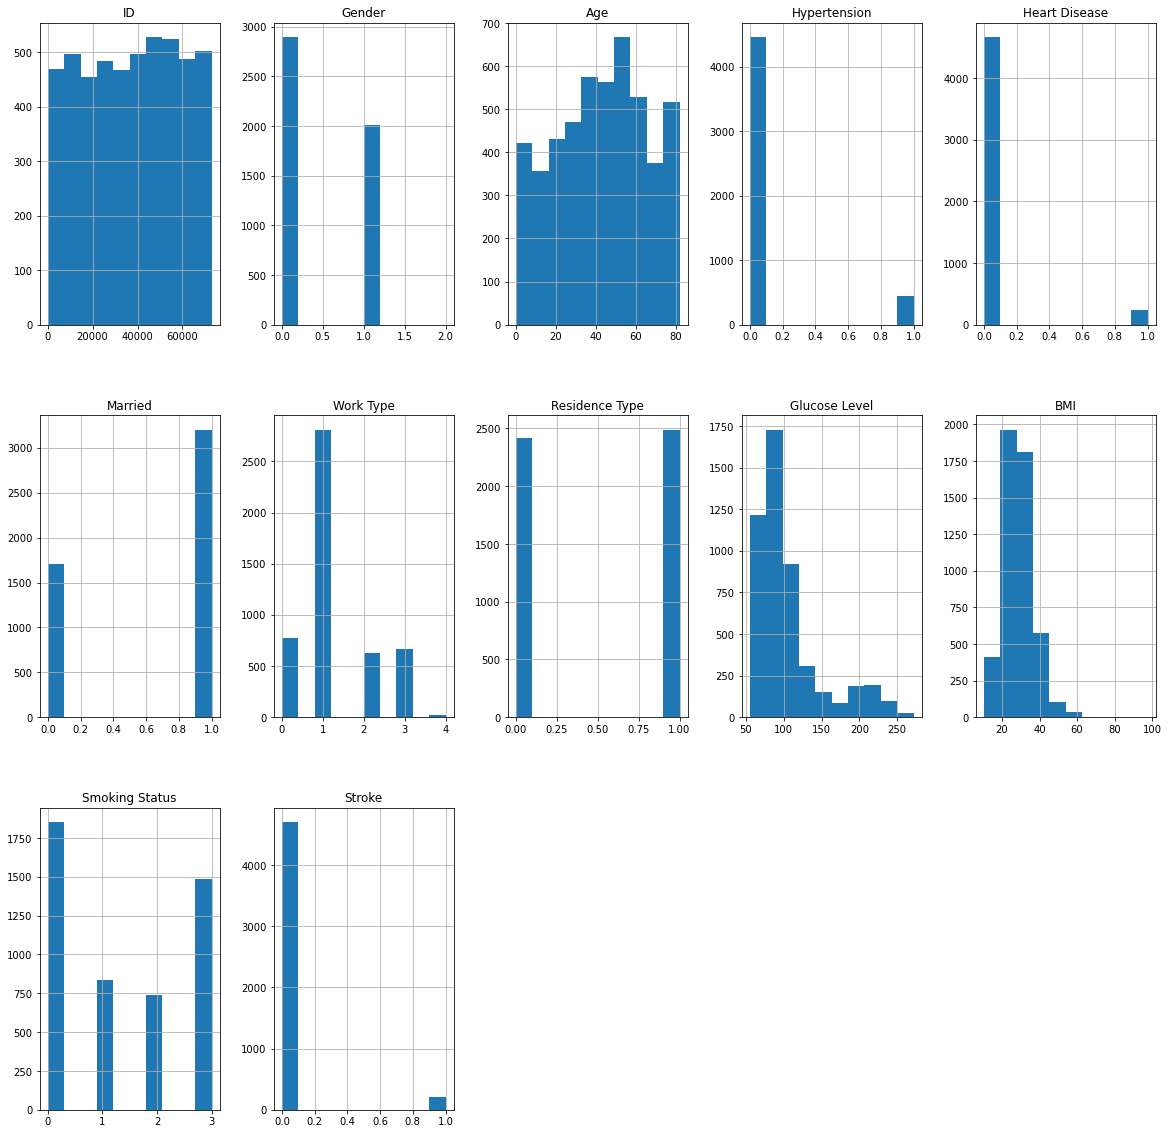

In [38]:
from matplotlib import pyplot
data1.hist(layout=(3,5), figsize = (20,20))
pyplot.show()

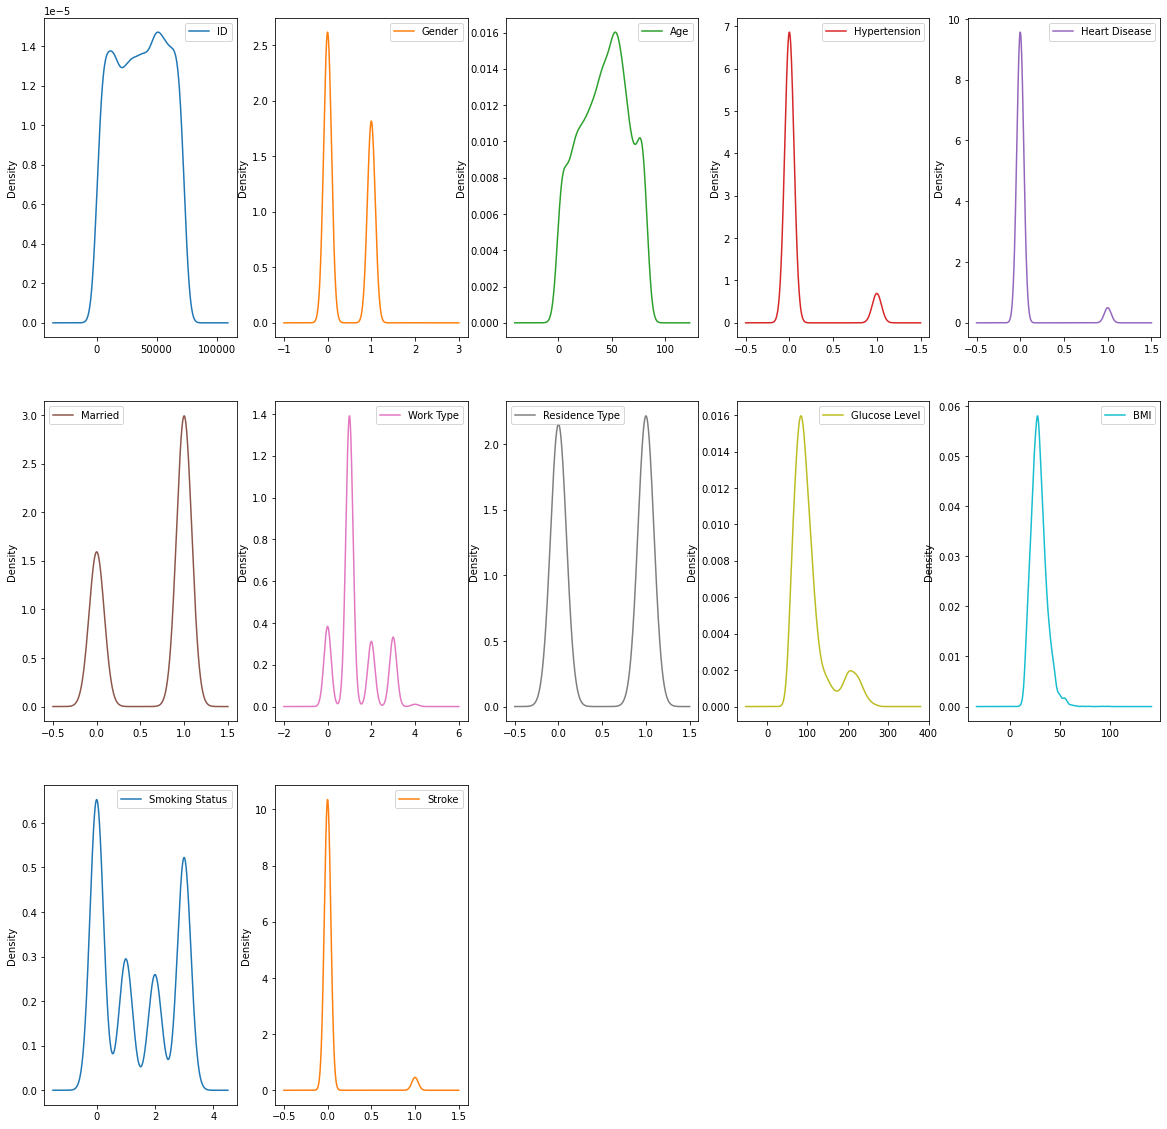

In [20]:
data1.plot(kind='density', subplots=True, layout=(3,5), figsize = (20,20), sharex=False)
pyplot.show()

In [21]:
#From these charts, we can infer that Age is left skewed, while hypertension, heart disease, glucose level, BMI, and
#stroke is right-skewed.

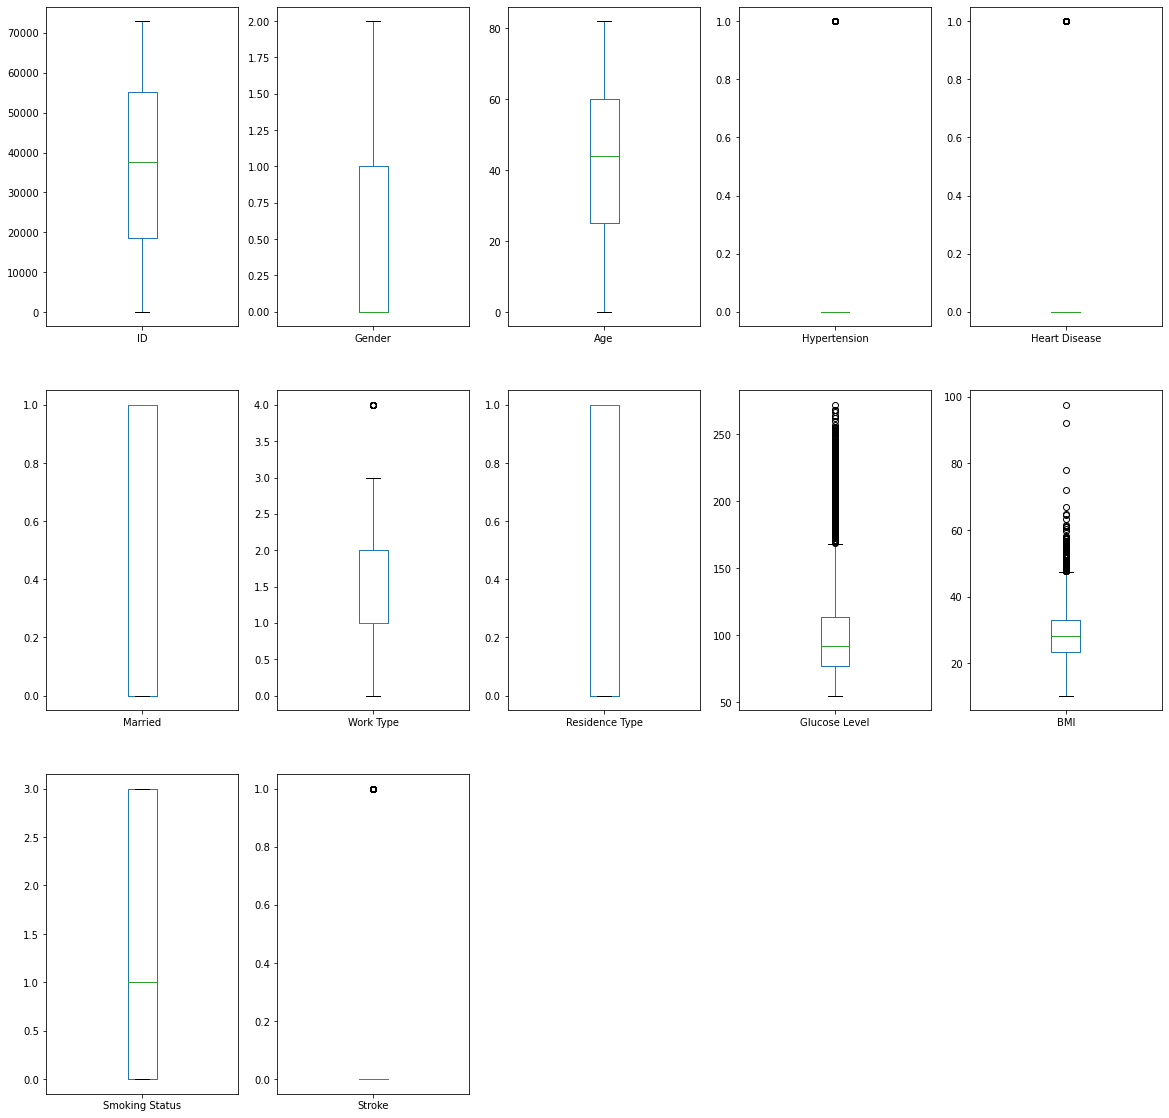

In [22]:
data1.plot(kind='box', subplots=True, layout=(3,5), figsize = (20,20), sharex=False, sharey=False)
pyplot.show()

In [ ]:
#Here, we can see that there are multiple outliers in the Glucose Level and BMI feature. We will then remove these outliers

In [5]:
# REMOVING OUTLIERS USING QUANTILES

# Get the upper and lower quantile limits you want for your data

q_lower1 = data1["Glucose Level" and "BMI"].quantile(0.01)
q_upper1  = data1["Glucose Level" and "BMI"].quantile(0.99)


# Filter off outliers with:

data2 = data1[(data1["Glucose Level" and "BMI"] < q_upper1) & (data1["Glucose Level" and "BMI"] > q_lower1)]

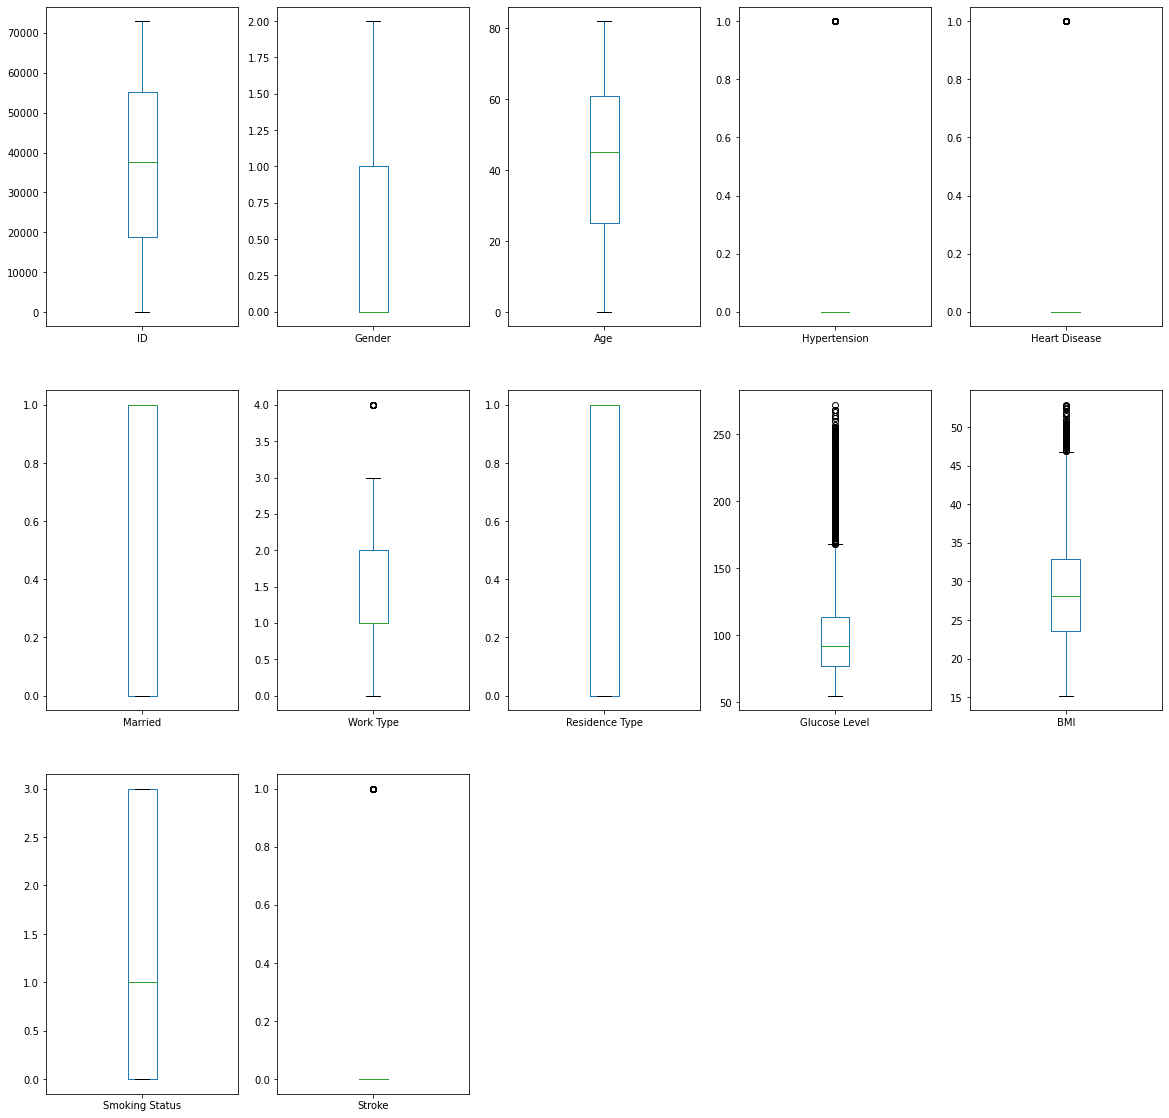

In [25]:
data2.plot(kind='box', subplots=True, layout=(3,5), figsize = (20,20), sharex=False, sharey=False)
pyplot.show()

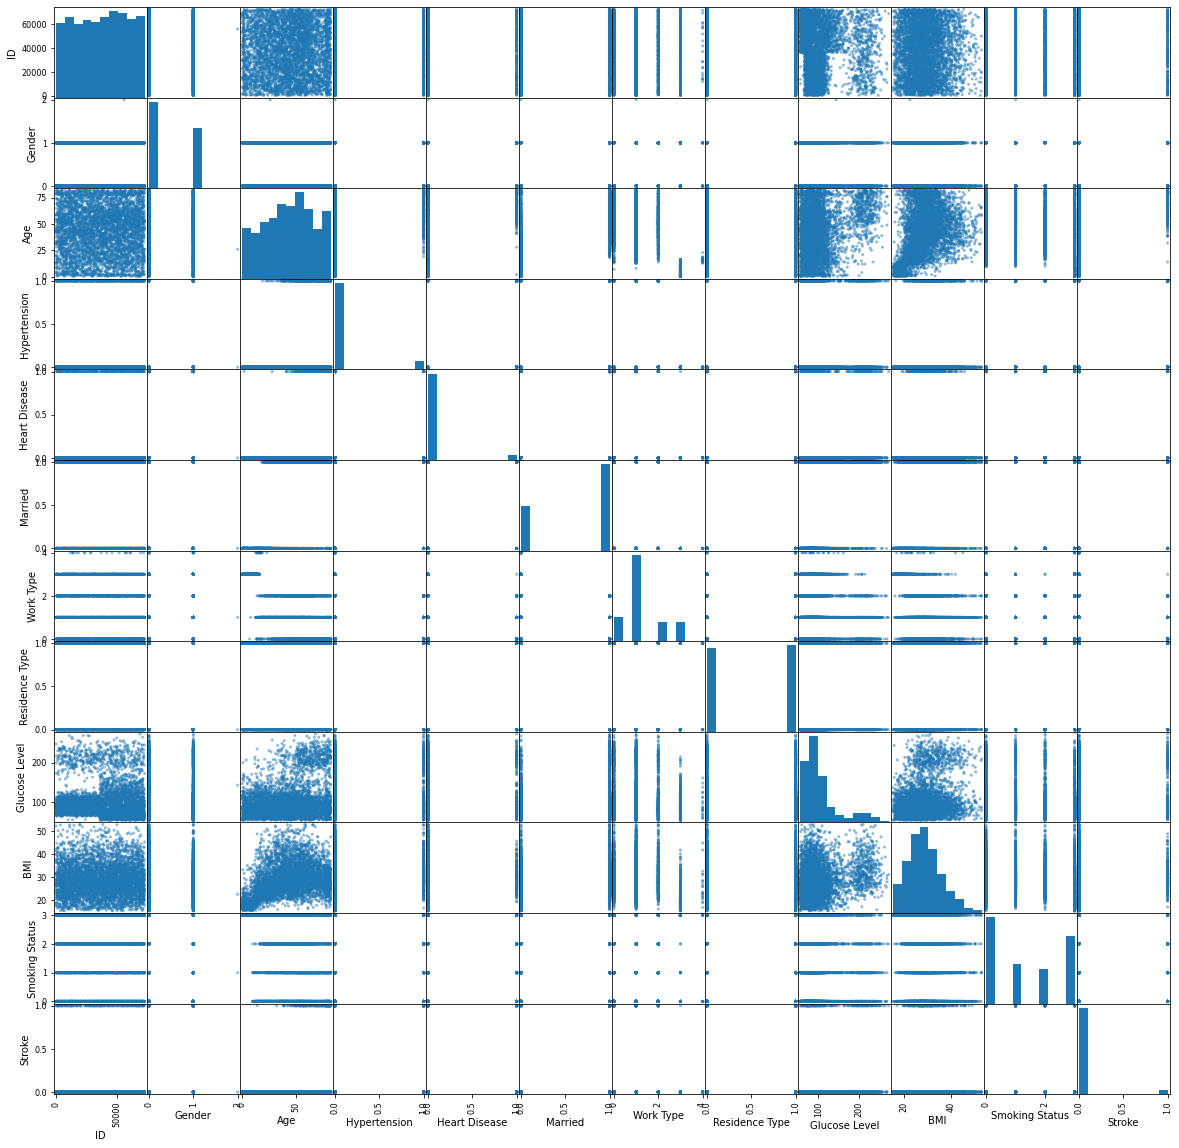

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(data2, figsize = (20,20))
pyplot.show()

In [ ]:
#As shown in this scatterplot matrix, there are many instances of weaker correlations in this dataset.

In [ ]:
### Milestone 2: EDA Stage 2

In [6]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
array = data2.values
# separate array into input and output components
X = array[:,0:11]
Y = array[:,11]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[9.996e-01 1.105e-04 7.404e-03 0.000e+00 1.105e-04 1.105e-04 1.105e-04
  1.105e-04 2.527e-02 4.045e-03 1.105e-04]
 [1.000e+00 3.214e-05 2.571e-03 0.000e+00 3.214e-05 3.214e-05 3.214e-05
  0.000e+00 3.404e-03 1.045e-03 0.000e+00]
 [1.000e+00 0.000e+00 8.142e-04 0.000e+00 0.000e+00 1.662e-05 1.662e-05
  1.662e-05 2.845e-03 5.716e-04 3.323e-05]
 [9.934e-01 0.000e+00 4.713e-02 5.966e-04 0.000e+00 5.966e-04 0.000e+00
  0.000e+00 1.039e-01 1.432e-02 0.000e+00]
 [1.000e+00 1.765e-05 1.429e-03 0.000e+00 0.000e+00 1.765e-05 1.765e-05
  1.765e-05 3.286e-03 5.117e-04 1.765e-05]]


In [42]:
# Next, we will use Recursive Feature Elimination to select our final features

In [13]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = array[:,0:11]
Y = array[:,11]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)
print("Num Features: {}".format(fit.n_features_)) 
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_)) 

/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

Num Features: 4
Selected Features: [False False False  True  True False  True False False False False  True]
Feature Ranking: [9 6 2 1 1 7 1 5 8 4 3 1]


/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [44]:
# Here, we can see the four features that have been selected.
# You can see that RFE chose the top 3 features as age, hypertension, heart disease and work type. 
# These are marked True in the support array and marked with a choice 1 in the ranking array. 

In [45]:
# Next, we will use a plethora of classification ML algorithms, since the type of data we are working with pertains to classification.
# First, we will use Logistic Regression Classification

In [14]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
X = array[:,0:11]
Y = array[:,11]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(max_iter = 1000)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print(results.mean())

/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1372, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes

[nan  1.  1.  1.  1.  1.  1.  1.  1.  1.]
nan


In [ ]:
# Next, we will use Linear Discriminant Analysis

In [47]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = array[:,0:11]
Y = array[:,11]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9442723492723493


/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:396: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = (S**2 / np.sum(


In [ ]:
# We will then use K-Nearest Neighbors

In [48]:
# KNN Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
X = array[:,0:11]
Y = array[:,11]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9561330561330561


/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:
# Next, we will use Naive Bayes

In [49]:
# Gaussian Naive Bayes Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
X = array[:,0:11]
Y = array[:,11]
kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9103534303534303


/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:
# Then, we will use Classification and Regression Trees

In [50]:
# CART Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
X = array[:,0:11]
Y = array[:,11]
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.915355595980596


/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:
# Finally, we will use Support Vector Machines

In [19]:
# SVM Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
X = array[:,0:11]
Y = array[:,11]
kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 549, in _validat

nan


In [ ]:
# For some reason, we get nan for this algorithm

In [ ]:
### Milestone 3: EDA Stage 3

In [ ]:
# We will compare several algorithms to determine our modeling approach

In [2]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


data1 = data.dropna()
array = data1.values
X = array[:,0:12]
Y = array[:,11]

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

NameError: name 'data' is not defined

In [ ]:
# We can see that K-Nearest Neighbors and Linear Discriminant Analysis have performed the best

In [ ]:
# Next, we will rescale the data with a pipeline so that all the numbers have the same scale to make training perform better.
#First, we will use K-Nearest Neighbors

In [7]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# load dataset
array = data2.values
array1 = data2[['ID', 'Gender', 'Age','Hypertension','Heart Disease', 'Married', 'Work Type', 'Residence Type',
        'Glucose Level', 'BMI', 'Smoking Status', 'Stroke']].copy()
X = array1.iloc[:,0:12]
Y = array[:,11]

# create pipeline
estimators = []
estimators.append(('rescale', MinMaxScaler(feature_range=(0,1))))
estimators.append(('KNN', KNeighborsClassifier()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9567567567567569


In [ ]:
Next, we will use Linear Discriminant Analysis

In [65]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# load dataset
array2 = data2.values
array3 = data2[['ID', 'Gender', 'Age','Hypertension','Heart Disease', 'Married', 'Work Type', 'Residence Type',
        'Glucose Level', 'BMI', 'Smoking Status', 'Stroke']].copy()
X = array3.iloc[:,0:12]
Y = array2[:,11]

# create pipeline
estimators = []
estimators.append(('rescale', MinMaxScaler(feature_range=(0,1))))
estimators.append(('LDA', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9442723492723493


/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:396: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = (S**2 / np.sum(


In [ ]:
# Next, we will train the data with K-Nearest Neightbors

In [54]:
# Train Data
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

n_splits = 20
test_size = 0.33
 
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("Accuracy: {} ({})".format(results.mean()*100.0, results.std()*100.0))

[0.959 0.954 0.958 0.959 0.95  0.95  0.955 0.957 0.954 0.962 0.96  0.952
 0.953 0.955 0.95  0.955 0.96  0.951 0.962 0.951]
Accuracy: 95.53278688524588 (0.38932830759004583)


In [ ]:
# As shown above, this is the output of each test-train model using K-Neighbors Classifier. 
# The model is repeated 20 times, with the mean and standard deviation from the 20 iterations.
# It appears that the accuracy from this model has seen a slight decrease of -5.54*10^-4 percent from the pipeline

In [ ]:
# We will then repeat with Linear Discriminant Analysis

In [55]:
# Train Data
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_splits = 20
test_size = 0.33
 
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("Accuracy: {} ({})".format(results.mean()*100.0, results.std()*100.0))

[0.953 0.945 0.956 0.948 0.935 0.943 0.946 0.949 0.943 0.95  0.956 0.938
 0.95  0.951 0.945 0.946 0.95  0.94  0.961 0.939]
Accuracy: 94.72572509457756 (0.6399903091065774)


In [ ]:
# As shown above, this is the output of each test-train model using Linear Discriminant Analysis. 
# The model is repeated 20 times, with the mean and standard deviation from the 20 iterations.
# It appears that the accuracy from this model has seen a slight increase of 0.39 percent from the pipeline

In [ ]:
### Milestone 4: Algorithm Selection and Hyper-parameter Tuning

In [ ]:
# As seen in the previous milestone, the algorithim with the highest accuracy was K-Nearest Neighbors.

In [ ]:
## Bagging Methods

In [10]:
# Bagged Decision Trees
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

array = data2.values
array1 = data2[['ID', 'Gender', 'Age','Hypertension','Heart Disease', 'Married', 'Work Type', 'Residence Type',
        'Glucose Level', 'BMI', 'Smoking Status', 'Stroke']].copy()
X = array1.iloc[:,0:12]
Y = array[:,11]
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
cart = KNeighborsClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9565488565488565


In [68]:
#Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9567567567567569


In [69]:
# Extra Trees Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier


num_trees = 100
max_features = 7
kfold = KFold(n_splits=10, random_state=7)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9567567567567569


In [ ]:
## Boosting Methods

In [84]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9567567567567569


/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [87]:
# Stochastic Gradient Boosting Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

1.0


In [76]:
# Voting Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
# create the sub models
estimators = []
model1 = KNeighborsClassifier()
estimators.append(('knn', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = LogisticRegression()
estimators.append(('logistic', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

0.9656722106722107


/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
## Hyperperformance Tuning

In [9]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

-0.05517241379310338
1.0


/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.92835e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [8]:
from scipy.stats import uniform
from sklearn import neighbors, datasets
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier


KNN = neighbors.KNeighborsClassifier()

penalty=['l2', 'l1']

C=uniform(loc=0, scale=4)

hyperparameters = dict(C=C, penalty = penalty)

clf = RandomizedSearchCV(KNN, hyperparameters, random_state=7, n_iter=100, cv = 5, verbose=0, n_jobs=-1)

best_model = clf.fit(X,Y)

bestScore = best_model.best_estimator.get_params()['C']
print('Best C:', best_model.best_estimator.get_params()['C'])

ValueError: Invalid parameter C for estimator KNeighborsClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
distributions = dict(C=uniform(loc=0, scale=4)

                    penalty=['l2', 'l1'])
>>> clf = RandomizedSearchCV(logistic, distributions, random_state=0)
>>> search = clf.fit(iris.data, iris.target)
>>> search.best_params_
{'C': 2..., 'penalty': 'l1'}

In [91]:
# Random Search
import numpy
from pandas import read_csv
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

-0.05517241379310338
0.07630828937395717


In [ ]:
#### Part 5

In [1]:
array = data2.values
array1 = data2[['ID', 'Gender', 'Age','Hypertension','Heart Disease', 'Married', 'Work Type', 'Residence Type',
        'Glucose Level', 'BMI', 'Smoking Status', 'Stroke']].copy()
X = array1.iloc[:,0:12]
Y = array[:,11]

NameError: name 'data2' is not defined

In [ ]:
# Train Data
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

n_splits = 20
test_size = 0.33
 
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("Accuracy: {} ({})".format(results.mean()*100.0, results.std()*100.0))

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data2, test_size = 0.3,random_state=1234)

In [ ]:
#making independent variables for training
train_X = train.iloc[:, 1:12]
#making responsible variables for training
train_y=train.Stroke
#making independent variables for testing
test_X= test.iloc[:, 1:12]
#making responsible variables for testing
test_y =test.Stroke

In [ ]:
# Bagged Decision Trees
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

seed = 7
kfold = KFold(n_splits=10, random_state=seed)
cart = KNeighborsClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, train_X, train_y, cv=kfold)
print(results.mean())

In [ ]:
# As we can see, we have an accuracy increase to 0.954